In [2]:
import pyodbc
import pandas as pd

# Paramètres de connexion
server = 'LAPTOP-VAILS20L' 
database = 'DW_PI' 
username = 'sa'  
password = 'sa123' 
driver = '{SQL Server}'

# Connexion à SQL Server
try:
    conn = pyodbc.connect(
        f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'
    )
    print("Connexion réussie !")
except Exception as e:
    print("Erreur de connexion :", e)

Connexion réussie !


## Clustering des Candidats : Analyse des Profils selon Score et Moyenne au Ba

In [3]:
# Requête SQL
query = """
SELECT Candidature_Pk, score_final, moy_bac_et, Admission
FROM DW_PI.dbo.fact_date2
"""

df = pd.read_sql(query, conn)
conn.close()

C:\Users\souha\AppData\Local\Temp\ipykernel_10616\342577209.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [4]:
# Vérifie les valeurs manquantes
print(df.isnull().sum())

# Supprime ou impute les valeurs manquantes
df.dropna(inplace=True)  # ou faire un remplissage intelligent

# Vérifie les types
print(df.dtypes)


Candidature_Pk    0
score_final       0
moy_bac_et        0
Admission         0
dtype: int64
Candidature_Pk      int64
score_final       float64
moy_bac_et        float64
Admission           int64
dtype: object


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['score_final', 'moy_bac_et']])


In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\souha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\souha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


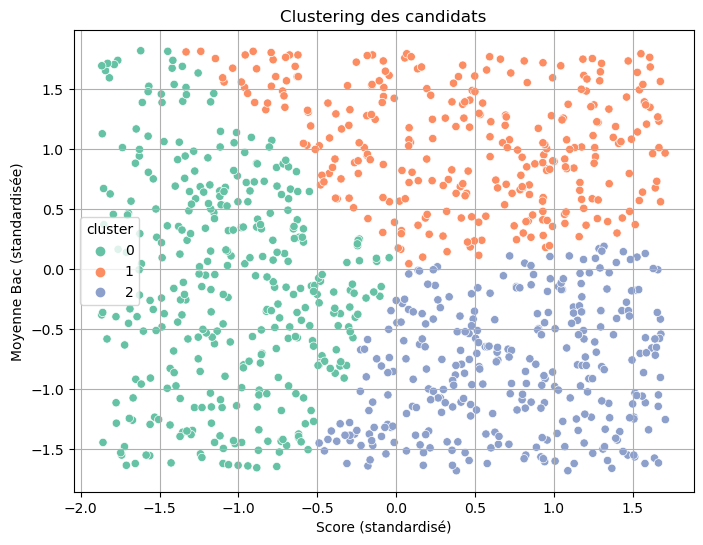

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df.copy()
df_plot[['score_final', 'moy_bac_et']] = X_scaled

plt.figure(figsize=(8,6))
sns.scatterplot(x='score_final', y='moy_bac_et', hue='cluster', data=df_plot, palette='Set2')
plt.title("Clustering des candidats")
plt.xlabel("Score (standardisé)")
plt.ylabel("Moyenne Bac (standardisée)")
plt.grid()
plt.show()


## Interpretation
🟢 Cluster 0 (en vert dans ton graphique)
Position : Bas à gauche


Candidats en difficulté ou ayant un profil académique faible.

Peut-être recalés ou admis avec réserve.

Stratégie possible :

Besoin d’accompagnement/remédiation ?

Cibles pour programme de soutien.

🟠 Cluster 1 (en orange, au-dessus)
Position : Haut du graphe, centré horizontalement


Étudiants ayant un bon niveau scolaire, mais des performances au test ou autres critères parfois inégales.

Bons profils académiques, à suivre de près.

Hypothèse :

Certains peuvent échouer à l’admission malgré une bonne moyenne, ou réussir grâce à leur dossier.

🔵 Cluster 2 (en bleu, à droite-bas)
Position : Score élevé (droite), Moyenne Bac plutôt faible


Candidats avec des bons scores aux tests ou bonnes performances post-Bac, mais un Bac moyen.

Peut refléter des profils "rattrapés" ou non conventionnels.

Intérêt :

Indique que certains réussissent malgré une note de Bac moyenne — profils potentiellement atypiques mais prometteurs.

In [8]:
# Enregistrement du DataFrame avec les clusters dans un fichier CSV
df.to_csv('clustering_resultats.csv', index=False)
print("Fichier CSV enregistré avec succès.")


Fichier CSV enregistré avec succès.
